In [13]:
import json
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [14]:
f_plane=open("planesnet/planesnet.json")
f_plane

<_io.TextIOWrapper name='planesnet/planesnet.json' mode='r' encoding='cp949'>

In [15]:
plane_dataset=json.load(f_plane)
f_plane.close()

In [17]:
plane_dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [73]:
plane_x=np.array(plane_dataset['data']).astype('uint8')
plane_y=np.array(plane_dataset['labels']).astype('uint8')
#int8,16,32,64, uint8(0~255),16,32,64
#int8:8비트로 정수를 표현(-128~127)

In [74]:
plane_x.nbytes #153600000 -> 38400000

38400000

In [75]:
plane_x.shape #20,20,3
#plane_y.shape
plane_x=plane_x.reshape([-1,3,20,20]).transpose([0,2,3,1])
plane_x


array([[[[206, 203, 188],
         [195, 192, 175],
         [187, 183, 164],
         ...,
         [214, 208, 178],
         [254, 246, 221],
         [255, 247, 229]],

        [[207, 204, 191],
         [200, 195, 180],
         [192, 187, 169],
         ...,
         [218, 212, 181],
         [255, 248, 226],
         [255, 248, 232]],

        [[217, 214, 200],
         [200, 195, 177],
         [194, 188, 170],
         ...,
         [220, 211, 180],
         [255, 242, 215],
         [255, 245, 225]],

        ...,

        [[183, 181, 167],
         [203, 200, 187],
         [204, 200, 189],
         ...,
         [251, 247, 236],
         [233, 228, 211],
         [190, 185, 166]],

        [[198, 193, 179],
         [209, 205, 194],
         [205, 201, 189],
         ...,
         [233, 233, 221],
         [222, 216, 202],
         [187, 180, 163]],

        [[193, 189, 174],
         [214, 209, 199],
         [208, 202, 188],
         ...,
         [236, 234, 224],
        

In [76]:
shuffle_index=np.arange(32000)
np.random.shuffle(shuffle_index)

In [77]:
plane_x=plane_x[shuffle_index]
plane_y=plane_y[shuffle_index]

In [78]:
plane_x=plane_x/255.0

In [79]:
plane_classes={0:'No Plane', 1:'Plane'}

In [80]:
plane_x[0].shape

(20, 20, 3)

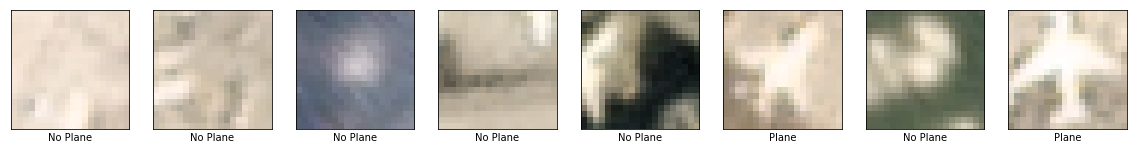

In [81]:
plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(plane_x[i],cmap=plt.cm.binary)
    plt.xlabel(plane_classes[plane_y[i]])

In [108]:
plane_x_train,plane_x_test,
plane_y_train,plane_y_test =
train_test_split(plane_x,plane_y,
                 test_size=0.2)

SyntaxError: invalid syntax (<ipython-input-108-07b474ab71f9>, line 2)

In [109]:
def cnn_model(inputshape):
    model=tf.keras.Sequential([
        keras.layers.Conv2D(32,(5,5),input_shape=inputshape, activation='relu',padding='same'),
        keras.layers.Conv2D(64,(5,5),activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.25),

        keras.layers.Conv2D(128,(5,5), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.25),    
        keras.layers.Flatten(),
        
        keras.layers.Dense(512,activation='relu'),
        keras.layers.Dropout(0.35),    
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dropout(0.35),           
        keras.layers.Dense(2,activation='softmax')        
    ]) 
    model.summary()
    return(model)

In [110]:
training_plane=cnn_model((20,20,3))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 20, 20, 32)        2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 2, 2, 128)        

In [111]:
import os
checkpoint_path1="cp.ckpt"
checkpoint_dir1=os.path.dirname(
    checkpoint_path1)

In [112]:
cp_callback1=tf.keras.callbacks.ModelCheckpoint(checkpoint_path1,
                                  save_weights_only=True,
                                  verbose=1)

In [113]:
training_plane.compile(optimizer=tf.keras.optimizers.Adam(), 
                      loss=tf.keras.losses.sparse_categorical_crossentropy,
                      metrics=['accuracy'])

In [114]:
import time

In [115]:
start_time_plane=time.time()
training_plane=training_plane.fit(plane_x_train, plane_y_train,    validation_split=0.33, epochs=30,   callbacks=[cp_callback1], batch_size=256)
traing_time_plane=time.time()-start_time_plane

"""
model.fit(...., validation_data(xVal,yVal))

validation_split=0.33
xTrain, yTrain을 33% 분리하여 검증데이터로 사용

"""


Train on 17152 samples, validate on 8448 samples
Epoch 1/30
16896/17152 [============================>.] - ETA: 0s - loss: 0.5192 - acc: 0.7671
Epoch 00001: saving model to cp.ckpt
17152/17152 [==============================] - 22s 1ms/sample - loss: 0.5157 - acc: 0.7689 - val_loss: 0.3581 - val_acc: 0.8294
Epoch 2/30
16896/17152 [============================>.] - ETA: 0s - loss: 0.3200 - acc: 0.8514
Epoch 00002: saving model to cp.ckpt
17152/17152 [==============================] - 22s 1ms/sample - loss: 0.3180 - acc: 0.8524 - val_loss: 0.2048 - val_acc: 0.9199
Epoch 3/30
16896/17152 [============================>.] - ETA: 0s - loss: 0.2046 - acc: 0.9173
Epoch 00003: saving model to cp.ckpt
17152/17152 [==============================] - 22s 1ms/sample - loss: 0.2051 - acc: 0.9172 - val_loss: 0.1641 - val_acc: 0.9328
Epoch 4/30
16896/17152 [============================>.] - ETA: 0s - loss: 0.1654 - acc: 0.9339
Epoch 00004: saving model to cp.ckpt
17152/17152 [==========================

'\nmodel.fit(...., validation_data(xVal,yVal))\n\nvalidation_split=0.33\nxTrain, yTrain을 33% 분리하여 검증데이터로 사용\n\n'

In [ ]:
training_plane.evaluate(plane_x_test,plane_y_test)
classification_plane=training_plane.predict(plane_x_test)


In [ ]:
#문제 1
#loss, accuracy 그래프 작성
#x축: epochs, y축 : loss or accuracy

#문제 2
#sonar 분류